![](T0.png)
![](E.png)

# Assignment Content 2
Name: Saddam Hossain
===========================
## Task A:

__Supervised Machine Learning Task__ (CareerCon 2019: ‘Helping Robots to Navigate’ Dataset)

 This dataset is publicly available on Kaggle’s website https://www.kaggle.com/c/career-con-2019. CareerCon collected sensor data while driving a small mobile robot over different floor surfaces on university premises.



__Objective__


The task is to predict to your robot which of the nine types of floor surface it is approaching, such as carpet, tiles or concrete.

This will help your robot navigate without assistance across many different surfaces, without falling down.


__Your Task__

You are required to implement at least three classification algorithms and to follow the following steps.

 
Prepare the data and the model(s). This could include the following considerations:
cross-validation: splitting your data into a training dataset and a validation dataset.
feature-selection techniques: choose the best features for your models. You may need to use techniques such as PCA (to reduce dimensionality) or feature engineering (to combine multiple features).

good parameters for your model: techniques such as validation curves, random searches and/or grid searches will often help you to choose the best parameters.
avoidance of underfitting and overfitting: the bias and variation trade-off. In practice, the learning curve is a good tool that can be used to find out how much you benefit from adding more training data and whether the model suffers more from a variance error or a bias error.
 

Once you have prepared each model, you need to train it. You are required to use at least three machine learning models.
Finally, you need to compare the results among the models. (2 marks)



 

## Task B:

__Unsupervised machine learning task__ (customer segmentation dataset / e-commerce data from the actual transactions of a UK retailer). This is a publicly available dataset on the Kaggle website https://www.kaggle.com/carrie1/ecommerce-data. It contains all the transactions during an eight-month period (1st December 2010 – 9th December 2011) for a UK-based online retail company. You need to use at least two algorithms to cluster this dataset.

 

## Task C: 

__Regression problem Task__

Finally, you are required to implement regression model to predict the cost insurance costs giving the age of primary beneficiary, an insurance contractor gender, the bmi: , the number of children covered by health insurance, smoking and the region. 



In [2]:
from time import time
import time
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.linear_model import LinearRegression
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing, metrics
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import time
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, load_iris
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import svm
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import lightgbm as lgb
import nltk
import os
import sys
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from pandas.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import time
from sklearn.model_selection import GridSearchCV, cross_val_score, RandomizedSearchCV, cross_val_predict
from sklearn.metrics import classification_report, r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from sklearn.svm import SVC
# fix random seed for reproducibility
plt.rcParams['figure.figsize'] = (15, 6)
from __future__ import print_function
from time import time
import logging
from sklearn.decomposition import PCA as RandomizedPCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
import xgboost
from sklearn.ensemble import  VotingRegressor
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.ensemble import VotingClassifier
print(__doc__)

Automatically created module for IPython interactive environment


# Task A - Supervised Machine Learning - Classification


### Building the model

There are many steps to build good machine learning model.

#### Visualize the data 
The  first  step  is  visualizing  the  data  and  understand  it.  The  goal  of  visualization  to check if there is missing data, to know the important of the features to each model, to find if there  is  correlation  between  features.

Pandas  package (Python  Data  Analysis  Library)  can be    used  to  do  the  visualization  with  some  other  Python’s  packages  (matplotlib,  ggplot,  seaborn, plotly and Bokeh).

#### Operations on Data set 

In [7]:
seed = 7
np.random.seed(seed)
plt.rcParams['figure.figsize'] = (15, 6)
data = pd.read_csv("data.csv")
classes = data.surface.unique().tolist()
data.head()

,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z,surface
0,-0.046204,-0.98736,-0.15161,0.002546,0.039092,0.023146,-0.079177,-0.34393,3.5044,-6.9990,fine_concrete
1,-0.145980,0.97786,0.14707,-0.028989,-0.078647,0.053215,-0.208740,0.44882,2.4389,-10.7710,soft_pvc
2,0.717310,-0.68013,-0.09879,0.114560,0.076255,0.264960,-0.817360,2.33630,3.4870,-11.3420,concrete
3,0.477300,-0.86593,-0.12828,0.076725,-0.084376,0.110700,-0.067410,-4.57100,2.6196,-8.3643,concrete
4,-0.087323,-0.98471,-0.15069,-0.003798,-0.073466,-0.069948,0.027935,1.01870,2.6466,-10.6030,fine_concrete


In [8]:
class_counts = data.groupby('surface').size()
print(class_counts)
len(data)

surface
carpet                     4881
concrete                  19945
fine_concrete              9317
hard_tiles_large_space     7907
soft_pvc                  18836
soft_tiles                 7655
tiled                     13072
wood                      15388
dtype: int64


97001

In [10]:
#### Prepare the data for classification
lst = data.columns.to_list()
names = lst[0:-1]
data.dropna(inplace=True)
dataset = data[lst[0:-1]].values
X = dataset.astype(float)
target = data[lst[-1]].values
le = preprocessing.LabelEncoder() 
targetEncode = le.fit(target)
Y = targetEncode.transform(target)

In [9]:
# Make developement dataset for genrilization and final testing
# Extracting 20% testing data
# features = preprocessing.scale(X)
features = preprocessing.maxabs_scale(X)
target = Y
X_train_feature, X_deploy, y_train_feature, y_deploy = train_test_split(
    features, target, test_size=0.20, random_state=0)
# Make training and validation data sets for building the models and choose the hyperparameters
X_train, X_test, y_train, y_test = train_test_split(
    X_train_feature, y_train_feature, test_size=0.25, random_state=0)

print('Number of training examples',len(X_train))
print('Number of validation examples',len(X_test))
print('Number of testing examples',len(X_deploy))

Number of training examples 58200
Number of validation examples 19400
Number of testing examples 19401


[0.16801303 0.15461998 0.18319238 0.1768551  0.03571798 0.05638682
 0.11612096 0.03687719 0.03610864 0.03610794]


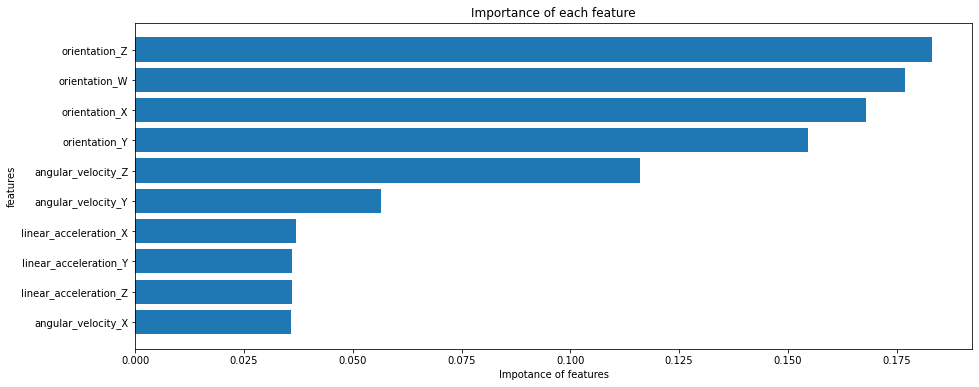

In [51]:
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# display the relative importance of each attribute
print(model.feature_importances_)
imp = model.feature_importances_
imp, names = zip(*sorted(zip(imp,names)))
plt.barh(range(len(names)), imp, align = 'center')
plt.yticks(range(len(names)), names)
plt.rcParams['figure.figsize'] = (20, 30)
plt.xlabel('Impotance of features')
plt.ylabel('features')
plt.title('Importance of each feature')
plt.show()

In [52]:
# Compute Confusion Matrix
plt.rcParams['figure.figsize'] = (15, 6)
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    target_names= classes
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Building classifiers

The following are some functions will help you train and test your models.

1. XGBoost Model

In [ ]:
num_folds = 2
from operator import itemgetter
def report(grid_scores, n_top=5):
    params = None
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Parameters with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.4f} (std: {1:.4f})".format(
              score.mean_validation_score, np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")
        
        if params == None:
            params = score.parameters
    
    return params

# The most common value for the max number of features to look at in each split is sqrt(# of features)
sqrtfeat = np.sqrt(X.shape[1]) 
grid_test1 = { "max_depth"      : [1,2,3,4,5]}

# Large randomized test using max_depth to control tree size (5000 possible combinations)
random_test1 = { "max_depth"      : np.arange(1,6)}


forest = xgboost.XGBClassifier()

#print ("Hyperparameter optimization using GridSearchCV...")
#grid_search = GridSearchCV(forest, grid_test1, n_jobs=-1, cv=num_folds)
#grid_search.fit(X, Y)
#print(grid_search.best_estimator_)
#print ('+++++++++++++++++++++++++++++++++++++++++++++++')
print ("Hyperparameter optimization using RandomizedSearchCV")
Random_search = RandomizedSearchCV(forest, random_test1, n_jobs=-1, cv=num_folds, n_iter=5)
Random_search.fit(X, Y)
print(Random_search.best_estimator_)

Hyperparameter optimization using RandomizedSearchCV


2. k-Nearest Neighbors  Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
parameters =  {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14], 'algorithm': ['auto','ball_tree','kd_tree','brute']}
knn = KNeighborsClassifier()
clf = RandomizedSearchCV(knn, parameters, n_iter=5)
clf.fit(X_train, y_train)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

3. Decsion Tree classifier

In [ ]:
from sklearn import tree
parameters = {'criterion':('gini', 'entropy'),
              'min_samples_split': [ 2, 3, 4],
              'min_samples_leaf': [ 2, 3, 4]}

dt = tree.DecisionTreeClassifier()
clf = RandomizedSearchCV(dt, parameters, n_iter=7)
clf.fit(X_train, y_train)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

4. Random Forest

In [ ]:
RF = RandomForestClassifier(max_depth = 77, random_state=20)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_train)
print(metrics.classification_report(y_train, y_pred))

print("Training F1 Score:", metrics.f1_score(y_train,y_pred,average='weighted'))
y_pred1 = model.predict(X_test)
print("Testing F1 Score:", metrics.f1_score(y_test,y_pred1,average='weighted'))

5. Logistic Regression

In [ ]:
parameters = {'solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
              'penalty':('l1', 'l2', 'elasticnet'),
              'C': [0.5,1,2]}
LR = LogisticRegression()
clf = RandomizedSearchCV(LR, parameters, n_iter=5)
#clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
        % (mean, std * 2, params))



__B:- Learning Curve__

In essence, what we’re doing it training the exact same model with increasingly large fractions of our total training data, and plotting the error of the training and test sets at each step.

In [ ]:
# This function can plot the learning cure. You need to call this function after you build your machine learning model
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation (Testing or validation) score ")

    plt.legend(loc="best")
    return plt

In [ ]:
# Use this code to check your learning rate after each classifiers
# Make your model does not  underfit (high bias and low variance)  the data or overfit (low bias and high variance)
# score curves, each time with 20% data randomly selected as a validation set.
title = "Learning Curves"
# NW is neural networks model that has been defined by NW = MLPClassifier(). If you want to use other classifier you need to change this name
plot_learning_curve(RF, title, X_train, y_train, ylim=(0.2, 1.01), n_jobs=-1)
plt.show()

__C:- Measure the performance of the model USED Voting Classifier__

In [ ]:
# ModelName  takes the name of the model for example ModelName = NW such that NW = MLPClassifier()

eclf = VotingClassifier(estimators=[('knierest_neighbours', knn),('xgboost', forest),('randomforest', RF), ('Decision_tree', dt), ('logistic', LR)])
eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)
print ("\n===================================================================")
print (metrics.classification_report(y_test, y_pred, target_names=classes))
print ("===================================================================")
print ("The accuracy on validation dataset of Voting: \t", metrics.accuracy_score(y_test, y_pred))
print ("Precision on validation dataset of Voting:    \t", metrics.precision_score(y_test, y_pred,average= 'weighted'))
print ("Recall on validation dataset of Voting :      \t", metrics.recall_score(y_test, y_pred, average= 'weighted'))
print ("F1 score on validation dataset of Voting:     \t", metrics.f1_score(y_test, y_pred, average= 'weighted'))

In [ ]:
# Function can be used to prine the confusion matrix
# Compute Confusion Matrix
plt.rcParams['figure.figsize'] = (15, 6)
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    target_names= classes
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#You can call the following function after you build the model and find y_pred to plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure(1)
plt.subplot(2,2,1)

plot_confusion_matrix(cm)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
#plt.figure()
plt.subplot(2,2,2)

plot_confusion_matrix(cm_normalized, title='Normalized confusion matrix')

plt.show()

In [ ]:
# Use this code to check your learning rate after each classifiers
# Make your model does not  underfit (high bias and low variance)  the data or overfit (low bias and high variance)
# score curves, each time with 20% data randomly selected as a validation set.
title = "Learning Curves"
# NW is neural networks model that has been defined by NW = MLPClassifier(). If you want to use other classifier you need to change this name
plot_learning_curve(knn, title, X_train, y_train, ylim=(0.2, 1.01), n_jobs=-1)
plt.show()

# Conclusion
At first, I have visualized the data, setup all data for classification and splitting into a training  and validation dataset for building the models and choose the hyperparameters. Secondly, use extraTreeClassifier to display the relative importance of each attribute with compute confusion matrix.

Ther are many models used XGBoost,k-nearest,decision tree, random forest, logistic regression with used a good parameter RandomizedSearch for optimization hyperparameter. As a result, Rando Forest classification has been found to be a best result training and testing data, k-nearest and decision tree are the nearest training and testing result where logistic regression was the poor result has been found.Measure the performance of the model USED Voting Classifier then plot the confusion matrix

# Task B - Unsupervised machine learning - Clustering

# Task B - Unsupervised machine learning - Clustering

## k- means

In [11]:
df = pd.read_csv("Cust_Segmentation.csv")
del df["Customer Id"]
del df["Defaulted"]
df.dropna(inplace=True)
adress = df["Address"].values
lencoding = preprocessing.LabelEncoder() 
targetEncode = lencoding.fit(adress)
df["Address"] = targetEncode.transform(adress)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Address,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,1,6.3
1,47,1,26,100,4.582,8.218,21,12.8
2,33,2,10,57,6.111,5.802,13,20.9
3,29,2,4,19,0.681,0.516,9,6.3
4,47,1,31,253,9.308,8.908,8,7.2


In [12]:
X = dataset.astype(float)
X = preprocessing.scale(X)
X = pd.DataFrame(X)


In [12]:
ms_kmeans = KMeans(n_clusters=10, init='random', n_init=5, random_state=109).fit(X)
display(ms_kmeans.cluster_centers_)
display(ms_kmeans.labels_[0:10])

array([[-1.54780482e-01,  4.85486480e-01,  4.76917660e-01,
        -1.71851737e-01,  1.00008359e+00, -1.77758007e-01,
         6.70403188e-02,  2.39715230e-02, -1.84137129e+00,
        -2.53774993e+00],
       [ 2.01475740e-01, -2.74357610e-02, -3.01526259e-02,
         2.08775798e-01,  5.02590456e-02,  2.13396290e+00,
        -2.51762352e+00, -9.33463246e-02,  6.75000614e-02,
         8.13724878e-04],
       [ 1.06478684e+00, -1.01072260e+00, -9.44442390e-01,
         1.08391943e+00,  1.19475137e-02, -5.42107607e-02,
         6.07067124e-02,  1.43196770e-02, -3.91767063e-02,
        -9.39408564e-03],
       [-2.21808601e-01,  4.54868010e-01,  4.45011261e-01,
        -2.39208631e-01,  1.57108884e-02, -7.61062724e-02,
         7.44159561e-02,  7.32296305e-01,  2.02201782e+00,
         2.53861682e+00],
       [-1.44894064e-01, -7.31098407e-02, -9.43570067e-02,
        -1.35257821e-01, -2.75941250e-02, -2.16719382e+00,
         2.52794047e+00,  1.43158554e-01,  7.90181044e-02,
         8.

array([9, 5, 1, 2, 9, 9, 4, 2, 1, 9])

In [13]:
wss = []
inti_K = 1
End_K = 13
for i in range( inti_K, End_K):
    fit_kmeans = KMeans(n_clusters=i, init='random' , n_init=7 ,random_state=100).fit(X)
    wss.append(fit_kmeans.inertia_)

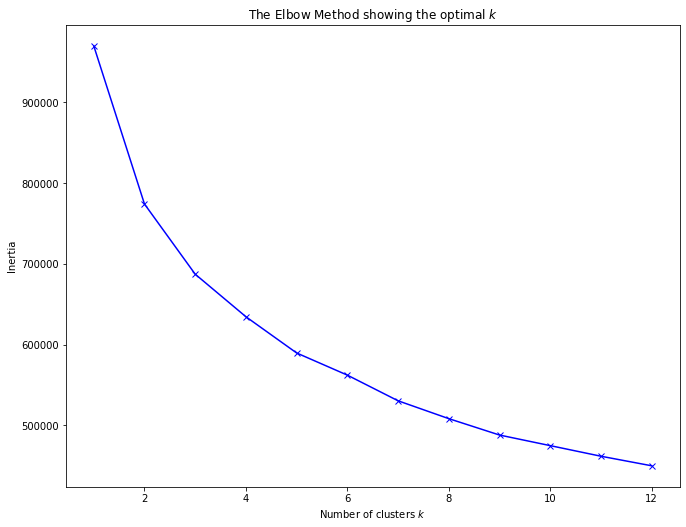

In [14]:
plt.figure(figsize=(11,8.5))
plt.plot(range(inti_K,End_K), wss, 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal $k$')
plt.show()

In [15]:
from kneed import KneeLocator
kl = KneeLocator(
    range(inti_K, End_K), wss, curve="convex", direction="decreasing")
kl.elbow

4

# Quality of Clusters: Silhouette

In [16]:
from sklearn.metrics import silhouette_score
ms_kmeans = KMeans(n_clusters=10, init='random', n_init=10, random_state=100).fit(X)
silhouette_score(X, ms_kmeans.labels_)


0.1779605289816922

In [16]:
# Check with more k
from sklearn.metrics import silhouette_score
inti_K = 1
End_K = 13
scores = [0]
for i in range(inti_K+1,End_K):
    fitx = KMeans(n_clusters=i, n_init=7, random_state=109).fit(X)
    score = silhouette_score(X, fitx.labels_)
    scores.append(score)

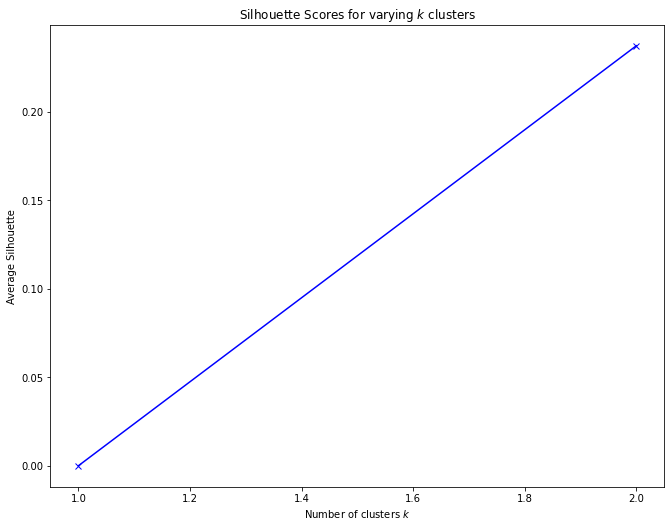

In [17]:
plt.figure(figsize=(11,8.5))
plt.plot(range(inti_K,End_K), np.array(scores), 'bx-')
plt.xlabel('Number of clusters $k$')
plt.ylabel('Average Silhouette')
plt.title('Silhouette Scores for varying $k$ clusters')
plt.show()


## DBscan Clustering


In [ ]:
from sklearn.cluster import DBSCAN
ep =[0.6,0.7,0.8,0.9,1,2,5,6]
for ep1 in ep:
    fitted_dbscan = DBSCAN(eps=ep1).fit(X)
    fitted_dbscan.labels_
    result = silhouette_score(X, fitted_dbscan.labels_)
    print("siloutte:", result)



siloutte: -0.5650294138255819
siloutte: -0.4665090480797999


# Conclustion

At first, I have visualized the data, then use  K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.furthermore, use the quality of clusters inertia to show the plot. usually happens on the 'elbow' of the line.

The Silhouette Analysis measures how well a point fits into a cluster. To visualize a Silhouette Analysis, it's better to look to entire cluster.

DBscan uses an intuitive notion of denseness to define clusters, rather than defining clusters by a central point as in k-means.

# Task C - Regression Learning

In [26]:
df = pd.read_csv("insurance.csv")
cols = df.columns
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


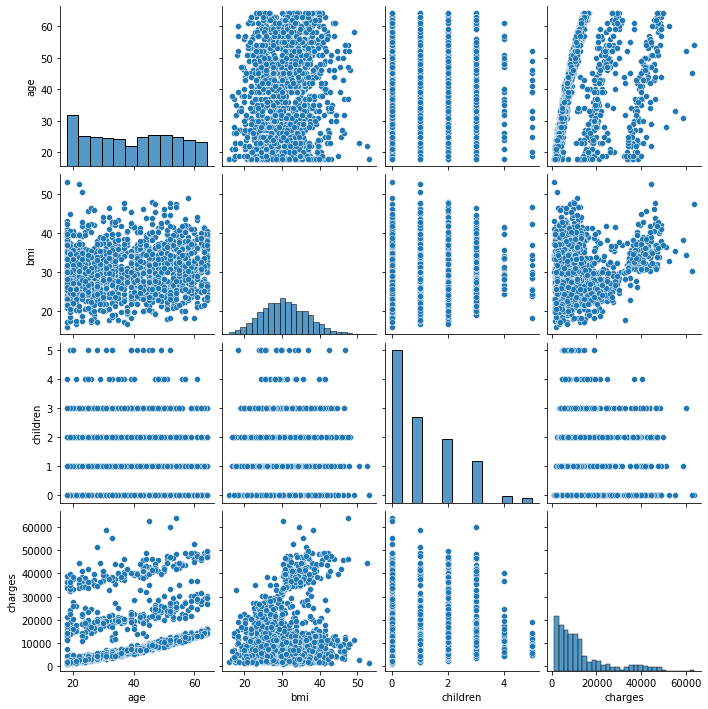

In [20]:
sns.pairplot(df)
plt.show()

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
X, Y = df.drop('charges', axis=1), df.charges
print(X.shape, Y.shape)
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough') 
X = columnTransformer.fit_transform(X)

(1338, 6) (1338,)


## Helper Functions

 ### Set the parameters for bias-variance dilemma 

In [22]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

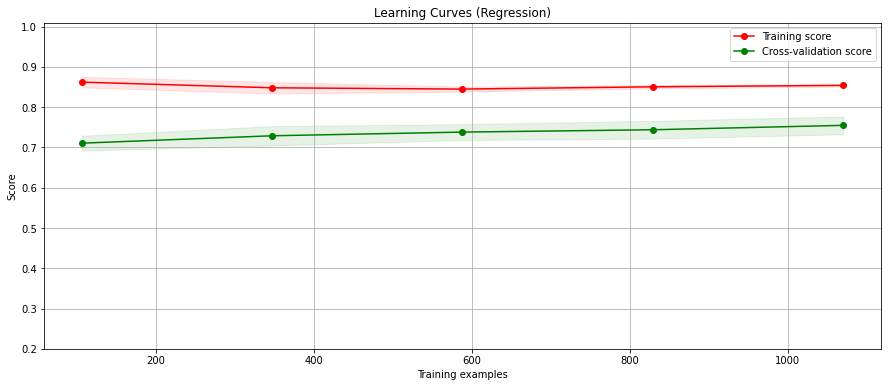

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
clf1 = RandomForestRegressor()
linear = LinearRegression()
kneighbours = KNeighborsRegressor()
model = VotingRegressor([('kneighbours',kneighbours),('random', clf1), ('linear', linear)])
# model = LinearRegression()
title = "Learning Curves (Regression)"
plot_learning_curve(model, title, X, Y, ylim=(0.2, 1.01), n_jobs=-1)
plt.show()

### Coefficients Of Determination {Calculating R^2}

After you define the regression Model

In [29]:
kfold = 10
predicted = cross_val_predict(model, X, Y, cv=kfold)
r_squared = r2_score(Y, predicted, multioutput='variance_weighted')
print ('R-squared = ',r_squared)

R-squared =  0.7604933110388098


### Residual Plot

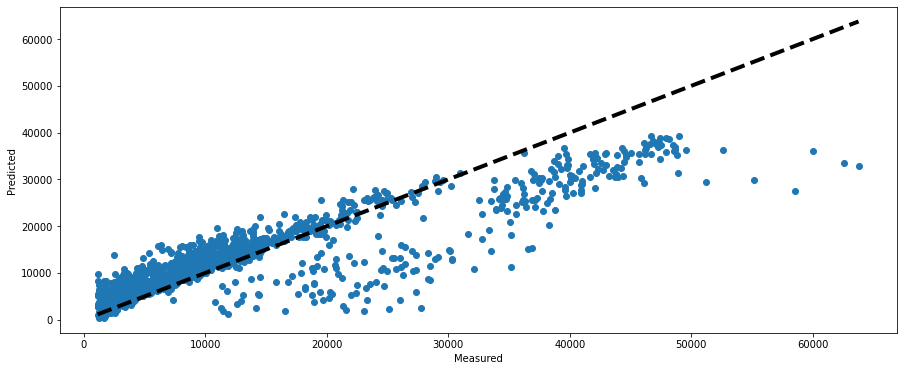

In [25]:
predicted = cross_val_predict(model, X, Y, cv=kfold)
fig, ax = plt.subplots()
ax.scatter(Y, predicted)
ax.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

### Conclusion

At first, I have visualized the data, then Set the parameters for bias-variance dilemma. Furthermore, there have been used many regression by Voting regressor to get the good results of r-squared. Finally, used residual plot to show the data output.